# Prologue

### This prologue chapter will describe what progress is made and what experiments are tried before the individual project is getting started.

I started this semester by looking through some of the datasets on Kaggle, but most of these datasets have many features and lots of data. But with all beginnings it is a good thing to start with something easy to predict and visualize.

The main experiment in the prologue will be trying to find a Kaggle dataset that has atleast a a little bit of a linear connection with the outcome and a single feature. This makes it possible to try out one of the simplest machine learning algorithms, Linear Regression. Because linear regression with only a single feature is so simple compared to the other algorithms  the plan is to write all the code for this algorithm from scratch to try and get a deeper understanding of how a computer can 'learn' things. Then later when the individual project is started the hope is that this deeper understanding can help me when I start using libraries to do the machine learning algorithms for me.

## Prologue backlog
Things to do during the prologue chapter:
- [x] Create a Jupyter notebook
- [x] Find a dataset with a possible linear correlation
- [x] Split the data in training and test data
- [x] Write the linear regression code
- [x] Train and test with the data
- [x] Visualize the results 

## The dataset

Prior to this prologue I watched a few videos on linear regression to get an idea about how it works and the the math involved.
[Linear Regression with Ordinary Least Squares Part 1](https://www.youtube.com/watchv=szXbuO3bVRk&ab_channel=TheCodingTrain)
In this video series from the coding train he uses the example of the linear connection between the temperature outside and the amount of ice cream sold. Of course many more features could be included such as the day of the week, humidity etc and it would likely give a more accurate prediction, but for learning purposes and to get started with linear regression just looking at the temperature will suffice. 

Kaggle has a lot of complicated datasets and after looking at datasets for a while before starting this prologue I decided to just look for the example given in the Coding Train video. And this is the dataset I found: [Ice Cream Revenue](https://www.kaggle.com/datasets/vinicius150987/ice-cream-revenue). The only problem I have with this dataset is that it only includes the temperature and the revenue. I would have liked more features to try and make a correlation heatmap to see if the temperature would be the biggest factor in determining the revenue. I will still try to do it with this dataset just to see what happens.

The revenue in the dataset is in US dollars and the temperature is in degrees Celcius.

In [1]:
import pandas as pd

# df = dataframe (Data sturcture in pandas)
df = pd.read_csv('Datasets/IceCreamData.csv')
print('Shape: ' + str(df.shape))
df.head()

Shape: (500, 2)


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


## Splitting the dataset

To have unseen data to verify the results the data will be split up in training and test data. For now the data will be arbitrarily split into **80% training data and 20% test data**.

In [2]:
from sklearn.model_selection import train_test_split
import math

train_data, test_data = train_test_split(df, test_size=0.2)
print('Training data shape: {}'.format(train_data.shape))
print('Test data shape: {}'.format(test_data.shape))
train_percent = math.floor(train_data.shape[0] / df.shape[0] * 100)
test_percent = math.floor(test_data.shape[0] / df.shape[0] * 100)
print('Split percentage (Training|Test) ({}|{})'.format(train_percent, test_percent))

Training data shape: (400, 2)
Test data shape: (100, 2)
Split percentage (Training|Test) (80|20)


## Plotting the dataset and predictions

I am going to plot the dataset to see if there is a linear correlation between the temperature and the revenue. The expectation is that there will be a linear correlation since the description of this dataset in Kaggle mentioned that the dataset 'is a simple sample dataset for training'. There could be a few outliers because the data is split up on revenue per day, but it also could be removed by the owner of the dataset because the dataset is just for beginners to get started.

And obviously the expectation is that the higher the temperature the higher the revenue will be. This means that the line that will be predicted will look something like this: ![Expected Line](Images/TemperatureRevenueExpected.png)
The formula for a line is \begin{equation} y = mx + b
\end{equation} and my prediction is that the value for b is going to be low as it is the intersection with the y-axis or the value when x = 0 which in this case means 0 degrees celcius.

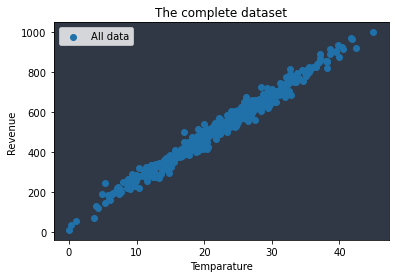

In [3]:
import matplotlib.pyplot as plt

# layout for all the graphs
plt_bg_color = '#303845'
plt_alpha = 0.08
plt_outline_color = 'white'

def setup_layout():
    fig = plt.figure()
    fig.patch.set_facecolor(plt_outline_color)
    fig.patch.set_alpha(plt_alpha)
    ax = fig.add_subplot(1,1,1)
    ax.set_facecolor(plt_bg_color)

def setup_graph():
    plt.xlabel('Temparature')
    plt.ylabel('Revenue')
    plt.legend(loc='upper left')
    plt.show()
    
setup_layout()
plt.title('The complete dataset')
plt.scatter(df['Temperature'], df['Revenue'], color = '#2071A9', label = 'All data')
setup_graph()

As expected the data points are clearly scattered in close proximity of a line. There are also no real outliers, which is not what I hoped because I would have liked to get some practice removing outliers from the dataset.

## Linear regression

In my understanding linear regression is a way for a machine to try and find the best linear formule for the training data that is given. Where the x-axis is the feature that is used for the prediction and the y-axis the value that is being predicted. The formula for a line is y = mx + b and since x is the input linear regression tries to find the best m and b value for the given data. After the best line for the data is found new input data can be given and the line can predict what the output will be.  

There also seem to be multiple methods to apply linear regression:
* Ordinary least squares
* Gradient descend

There might me more than the once listed above but these are the ones I found so far.
For this prologue I am atleast going to look at the ordinary least squares method first, because I already looked at gradient descend before starting this semester and the math can become very complex and gradient descend can also be used when training a neural network, so maybe something to look at later in the semester.

## Ordinary least squares

Ordinary least squares (OLS) is a way of estimating the unknown parameters (m and b) in a linear regression model. The algorithm that I am going to use for OLS is: ![OLS algorithm](Images/OlsCalcM.png)This algorithm was explained in part 2 of the Coding Train series [Linear Regression with Ordinary Least Squares Part 2 ](https://www.youtube.com/watch?v=_cXuvTQl090&ab_channel=TheCodingTrain) The algorithm looks at the squared sum of all the errors and tries to minimize the sum. The errors get squared to make the negative numbers (the errors below the predicted line) not cancel out the positive errors above the line. 

![OLS error](Images/OlsError.png)

The OLS algorithm needs the average of all the x and y values so I get those from the training data.

In [4]:
# There must be a more proper way to get the average of a DataFrame / series

x_train_data = train_data.loc[:,'Temperature'].tolist()
y_train_data = train_data.loc[:, 'Revenue'].tolist()
x_avg = sum(x_train_data) / len(x_train_data)
y_avg = sum(y_train_data) / len(y_train_data)
print('x average: {} | y average: {} '.format(x_avg, y_avg))

x average: 22.189195585907505 | y average: 520.7377043474248 


After calculating the averages it is possible to apply the rest of the formula on the training data.
m is calculated with the formule shown earlier.
When m is known b is easy to calculate. Because a linear formula is **y = mx+b**, which can be written as **b + mx = y** if both sides are reduced with mx we get the formula for b. **b = y - mx**

In [5]:
m = b = 0

# Ordinary least squares
numerator = 0 # teller
denominator = 0 # noemer
for i in range(len(x_train_data)):
    x = x_train_data[i]
    y = y_train_data[i]
    numerator += (x - x_avg) * (y - y_avg)
    denominator += (x - x_avg) ** 2
m = numerator / denominator # could be scary if denominator is 0, but that is very unlikely 
b = y_avg - m * x_avg

print('y = {} * x + {}'.format(round(m,2), round(b,2)))

y = 21.49 * x + 43.8


If I did it right the best m value for the line is approximately **21.27** and the best b value would be approximately **49.18**. I don't have an idea on how to check if this is good or not or how to give it an accuracy score. But a good first indication might be too look at the average error between all points in the training and test data. The average error in the training data should be lower, but it might not be a huge difference without the outliers and a data set that fits linear regression so well.
> After re-running the Kernel it seems that the data that is taken when splitting is random. This means that the results are not exactly the same everytime the Kernel runs.

In [6]:
avg_error_train = 0;
for i in range(len(x_train_data)):
    x = x_train_data[i]
    y = y_train_data[i]
    avg_error_train += abs(y - (m * x + b))

avg_error_train /= len(x_train_data)


x_test_data = test_data.loc[:,'Temperature'].tolist()
y_test_data = test_data.loc[:, 'Revenue'].tolist()
avg_error_test = 0;

for i in range(len(x_test_data)):
    x = x_test_data[i]
    y = y_test_data[i]
    avg_error_test += abs(y - (m * x + b))

avg_error_test /= len(x_test_data)

print('Average error in training data: {} \nAverage error in test data: {}'
      .format(round(avg_error_train,2), round(avg_error_test,2)))

Average error in training data: 20.29 
Average error in test data: 16.78


To figure out if what I did was even remotely right I will try to loop through all reasonable values for m and b to see if I can find a line that can better represent the data. I get that this method is flawed because I it will only loop through integer numbers an ignore decimal values. But it still should give an indication if the line that I found is reasonable.

In [7]:
# bf = brute force
avg_error_bf = avg_error_train + 1;  
bf_errors = []


for m_val in range(50):
    for b_val in range(75):
        avg_error_bf = 0
        for i in range(len(x_train_data)):
            x = x_train_data[i]
            y = y_train_data[i]
            avg_error_bf += abs(y - (m_val * x + b_val))
        
        avg_error_bf /= len(x_train_data)
        bf_errors.append(avg_error_bf)
        if avg_error_bf <= avg_error_train:
             print('A BETTER LINE FOUND WITH M: {} AND B: {} avg error {}'.format(rand_m, rand_b, avg_error_random))

print('Lowest error found: {}\nLOS error: {}\nDifference: {}'
      .format(
          min(bf_errors),
          avg_error_train,
          min(bf_errors) - avg_error_train)
       )

Lowest error found: 20.440199210649997
LOS error: 20.290001465966835
Difference: 0.15019774468316172


This little test shows that there are atleast no rounded number within a reasonable range that fits the data closer than what I found using OLS. This result makes me think that I applied the algorithm correctly, but there still might be a better solution out there. 

And the difference between the brute force method and the OLS method is really low, in some splits less than 0.2. This was not what I expected. But OLS still gives a better result than this brute force method and will hold up better with a larger dataset, because the time to calculate the values doesn't increase exponentially.

The last way I will try to find if the results of the OLS algorithms are useful I will try to plot the test data and the prediction line in the same graph. If they overlap the line found by the algorithm is a good fit for the data. I didn't do this step earlier because I didn't know how to draw multiple things in a single graph, but after training more with the pandas course from Kaggle and reading documentation on the plotlib library I figured it out.

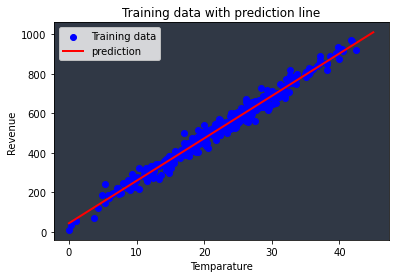

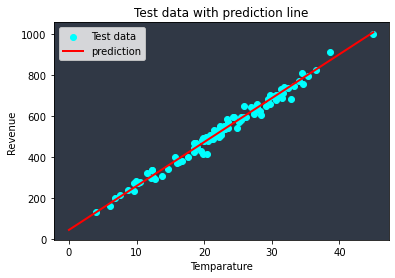

In [8]:
import numpy as np

# Setting up the line
min_x = df['Temperature'].min()
max_x = df['Temperature'].max()
x = np.linspace(min_x, max_x, 2) # create the outer points of the line

def draw_prediction_graph(title, label, dataset, scatter_color):
    setup_layout()
    plt.title(title)
    plt.scatter(dataset['Temperature'], dataset['Revenue'], color = scatter_color, label = label)
    plt.plot(x, m * x + b, color = 'red', label = 'prediction', linewidth = 2)
    setup_graph()
    
# Training data with prediction
draw_prediction_graph('Training data with prediction line', 'Training data', train_data, 'blue')

# Test data with prediction
draw_prediction_graph('Test data with prediction line', 'Test data', test_data, 'cyan')






## Prologue conclusion

During this prologue I learned a lot: I managed to find a dataset that would be easy to startwith,  I started working with a Jupyter notebook and got used to using the Python syntax, I plotted graphs with the matplot library and split the dataset in test and training data and finally applied linear regression with the ordinary least squares method to calculate a line that fits the dataset. After that I validated my results by calculating the average error, trying out a brute force algorithm to see if my answer is reasonable and I plotted the prediction line against the data. And even though I succeeded with this dataset, the computer did not really learn, it just applied a mathemetical formula on all the given data at once to find the best line. 
During the rest of the semester I would also like to look at problems that are more complex and where the computer gradually gets better until it can confidently solve the problem.


## Version control
After writing the Prologue it seemed like a good idea to put the notebook into Git and onto Github for version management and to have an online backup. It is also good preperation for the group project that likely will also have a notebook on Github.

As a software major I try not to overengineer the projects that I pursue during this semester I think putting the project on Github still adds value, especially for the group projects, but also in addition to the checkpoints that Jupyter creates.

Because of my major it was easy to put the notebook into Git. The only downside is that because the notebook is a mixture of markdown and code spread over different cells, the changes are difficult to view. The solution I found was using a tool called [ReviewNB](https://app.reviewnb.com/) that lets you view the changes on Github. In the near future I would also like find a solution to view my changes locally before I push them to Github.

After reading this [blog](https://blog.reviewnb.com/jupyter-version-control/) I found the option of adding [jupyterlab-git](https://github.com/jupyterlab/jupyterlab-git) to the notebook, but I couldn't get this to work. So instead I will use the merge editor from Visual Studio Code to deal with local merge requests in the notebook.

## Inspiration

The goal after writing the Prologue is to find inspiration for my individual challenge of the semester. Before the start of this semester I did a little bit of research into NN (neural network(s)) and I would like to learn more about how they can be applied and structured.

Before the start of the semester I already followed youtubers that also made videos about AI, so that is the first place I went to for inspiration. I watched all the projects made by Code Bullet and the series about [Genetic Algorithms](https://www.youtube.com/playlist?list=PLRqwX-V7Uu6bJM3VgzjNV5YxVxUwzALHV) by The Coding Train. Here I learned that a genetic algorithms is basically a type of reinforcement learning that is trying to simulate the idea of evolution theory with code. I instantly got hooked on the idea of doing something with a genetic algorithm, because of a couple reasons:
  - I find the idea of applying real world phenomena in code appealing;
  - It is great for story telling and visualisation and validation, because when you do it right you can actually see the agents improving and evolving over time.
  - The results can be fascinating, funny and unpredictable as the agents might try to cheat the system, fail horrible in the beginning or come up with revolutionary ideas while improving. 
  - A genetic algorithm can be used together with a neural network.
  - Agents can become so good at some of the tasks that humans could never compare.
  
The projects that inspired me the most are:
<br/>
<br/>
  **NeuroEvolution Flappy Bird from The Coding Train**
![NeuroEvolution Flappy Bird](Images/FlappyBird.png)
 <br/>
**NeuroEvolution Jump King from Code Bullet**
![NeuroEvolution Jump King](Images/JumpKing.png)

<br/>
In one of the Code Bullet videos he mentioned that he is using an algorithm similar to what Open AI used to beat dota. I never heard of Open AI, but I know that Dota is a very hard game to play for a computer therefore I started looking into the projects build by open AI. There I found the following inpressive projects:

**Open AI Five playing Dota 2**
![Open AI Five playing Dota 2](Images/OpenAiDota.png)
Open AI managed to beat the world champions with their Dota AI


They also used NeuroEvolution and self play to teach AIs to play hide and seek.  

**Open AI playing hide and seek**
![Open AI playing hide and seek](Images/OpenAiHideAndSeek.png)

These open AI projects are really impressive to me as Dota is very difficult to teach, because it is a really complex game with lots of variety and an environment that is constantly changing. It also is a team game requiring the bots to play well together.  

The hide and seek game peaked my interests, because the different generations got placed in increasingly diffucult scenarios and everytime either the hiding (defending) or seeking (attacking) team came up with a new stratergy later generations of the other team would find a way to break the new found strategy. And eventually the attacking team even found a way to break the physics engine to surf on top of a box and jump over the walls set up by the defending team (shown in the image below).  

**Attacking team cheating the system**
![Attacking team box surfing hide and seek](Images/OpenAiBoxSurfing.png)

Of course Open AI is a major company and this is unrealistic for my individual challenge, but the hope is that my individual challenge will also have the different generations show funny, genius or unexpected solutions that humans can learn from. I also think that AI works best when the powers of the AI and Humans are combined, so if time allows it I would also like to implement a way for humans to be in the created environment alongside the AI.
<br/>

**Primer** <br/>
Through watching videos of the channels above I also found the [Primer youtube channel](https://www.youtube.com/primerlearning). This channel has a lot of videos of visualizations of genetic algorithms in different environments. And the subjects covered by Primer are also really well explained and easy to understand.

![Primer Foraging Video](Images/PrimerForaging.png)

His video about [Simulating Foraging Decisions](https://youtu.be/nsVD8VPh96w) gave me the idea to create a survival simulation for my individual project.

But to be a managable project it has to be an easy simulation with easy decisions like should I forage a tree for food or should I cut down the tree for wood and create a fire?

![Easy Not Difficult](Images/EasyDifficult.png)


# The plan

After finding these various sources of inspiration I decided that I want to make a survival simulator. The survivors could have stats like hunger and warmth, thirst and they need to find resources to keep their stats up. 

The creatures that survive long enough will have a higher chance of producing offspring. This should lead to later generations being able to survive longer than their predecessors. 

I think this is an ambitous plan and for that reason I will start simple and make the environment more complex once the survivors can have found a consistant way or surviving in their current environment.

If the project goes really well then later environments could include things like the survivors being able to make a fire to stay warm, animals trying to hunt the survivors or a mechanic to encourage the survivors to work together (Altruism / Inclusive fitness).

### The goals
These are the goals I hope to achieve with this challenge:
  - Create a simple survival simulator that can be made more complex in the future.
  - Use a genetic algorithm to evolve the creatures to get better at surviving and adapting to their environment
  - Collect and visualize the data generated by the creatures and the world and use this to find generations with funny, unexpected or clever behaviour.
  - Allow a human to enter the simulation and survive with the AI's to see how humans and AI's interact.


### Prototyping idea 
I want to start by building a quick prototype to see if I am going to run into any limitations. I am planning to use PyGame for the visualisation, but do the other calculations myself so the program can run without having to draw all the pixels.
For the first version of the simulation the plan is to only have survivors and trees in the world and see if the survivors can learn to harvest fruit from the trees to survive.

Before building the survival prototype I wanted to get used to PyGame. And an easy project to learn the ropes is the classic game snake.

**Learning PyGame with snake**
![Snake in PyGame](Images/SnakeInPyGame.png)

**First version of the survival simulation**
![First prototype](Images/IndiProjectPrototype_1.png)
<br/>
#### Optimizations
I took a few precautions to help with the simulation speed and hopefully help speed up the training later, but because these optimizations are not closely related to AI I will not discuss them here. I however will discuss them in the [Readme file](https://github.com/MatthijsFontys/AISocietyIndividualProject/blob/master/README.md) that is on the Github for this project.

# Genetic algorithm

In the goals section I specify that I want the survivors to solve their environment using a genetic algorithm. To clarify this I will define my definition of a genetic algorithm below:
<br/><br/>

A genetic algorithm is an algorithm that starts with a population of a chosen size. Each member of the population gets their DNA randomly generated. Then all members of the population are continuously given a fitness score based on their performance. 
<br/><br/>
The population must be able to change. This can happen through replacing the old generation with an entirely new generation all at once, or by removing members with a low fitness score and slowly adding new members to the population.
<br/><br/>
The process of creating new members fit for the population is the following:
- Two parents are chosen from the current population with a probability according to relative fitness.
- New members have DNA that is combined from its parents. (crossover)
- The new member's DNA is changed (mutated) based on a given probability (mutation rate) to account for a possible lack of variety in the starting population.
- The new unit is added to the population

Each new generation also gets a fitness valueand eventually replaced with members of a new generation.

To clarity: the DNA can be anything that can help a member of the population achieve its goals. In simple scenarios these even could be arrays of integer values or Vectors. But in more complex scenarios and changing environments the DNA consists of a neural network. Where each generation evolves the values for the weights in the network. And atleast in my understanding when a genetic algorithm gets paired with Neural Networks it is called NeuroEvolution



# Genetic Algorithm with snake

I want to look at snake first, because it is such an easy game. And as always I try to start easy so I will do try the genetic algorithm first without a neural network. The DNA will be an array of the directions the snake can choose to move. And the fitness score will be a combination of the snake's length and the time it manages to stay alive.
I doubt the results that this DNA can achieve is anything special, because snake is a game with randomness and without the snake being able to perceive its environment it will not try and eat the food. To counteract this and get some better results to see if the genetic algorithms really is working I will predetermine the food spawn locations so the environment doesn't change and the newer generations get to adapt. After the current DNA is replaced with a neural network this is no longer necessary as it lets the agents perceive the world.

I want to be able to look at the results without having to watch the entire process in PyGame. Therefore I will have to store the results of each generation and compare the results to a generation that has not evolved at all, to see if newer generations are making progress. Graphing the data will be the same thing I did in my prologue chapter. The difference is that I now need to collect the data myself instead of just read a csv that I got from Kaggle. But luckily the Pandas library allows you to make your own Dataframe and export it as a csv. Then it is easy go graph the data. Also luckily Kaggle has a good [tutorial](https://www.kaggle.com/learn/pandas) on how to work with dataframes. I also used this tutorial to learn how to plot the data in Prologue.

Below I will try to make an example to see how I could gather the data from snake and put it in a dataframe. Ofcouse the example is hardcoded, but the actual data will be gathered from the snake game. I also could save the plotted data as an image and look through the images after training to look for interesting results.

,Random best,Genetic best
Gen,,
1,1,1
2,3,1
3,2,2
4,3,2
5,4,3


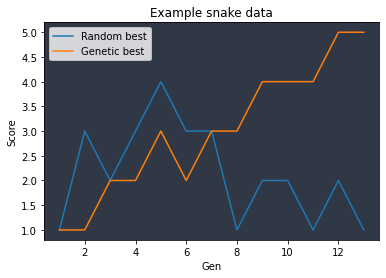

In [73]:
save_as_img = False
snake_example_df = pd.DataFrame({
    'Random best': [1, 3, 2, 3, 4, 3, 3, 1, 2, 2, 1, 2, 1],
    'Genetic best': [1, 1, 2, 2, 3, 2, 3, 3, 4, 4, 4, 5, 5]
})

# start index at 1, since generation starts at 1
snake_example_df.index+=1
snake_example_df.index.name='Gen'

def plot_snake(df, title):
    # TODO: figure out how I can keep my code organized even when the notebook gets much larger
    # TODO: figure out if I can use setup layout when using df.plot() instead
    setup_layout()
    # TODO: I need to learn matplotlib better and clean up plotting code
    plt.plot(df)
    plt.xlabel('Gen')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend(snake_example_df.columns, loc='upper left')
    
plot_snake(snake_example_df, 'Example snake data')

# it is easy to save a plot as an image
if save_as_img:
    plt.savefig('PlotImages/snake_example.png')

snake_example_df.head()

### Actual snake data

Below is the actual data I gathered from the snake game


,random best,genetic best
gen,,
1,2,2
2,2,3
3,2,3
4,2,3
5,2,3


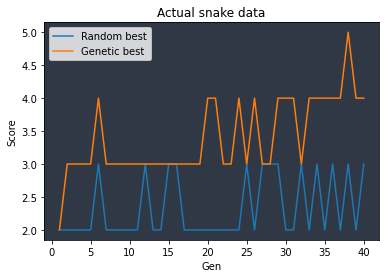

In [72]:
snake_actual_df = pd.read_csv('simulation/snake/data/genetic_vs_random_gen_1_to_40.csv')
snake_actual_df = snake_actual_df.set_index('gen')

plot_snake(snake_actual_df, 'Actual snake data')
snake_actual_df.head()

# The first simulation

After creating the most basic version of the simulation where creatures can walk and if they are close to a tree can get food from the tree to still their hunger. They die if their fullness value reaches 0. The trees slowly regrow food for the survivors to harvest. 

Because this simulation is so basic I think it is possible to solve by evolving a basic feed forward
neural network where everything is connected. 

later on in more complex situations I am planning on using an algorithm called NeuroEvolution Of Augmenting Topologies (NEAT). I will explain this algorithm in more detail when I start using it, but for now it is enough to know that it not only mutates the weights of a neural network, but also its structure to find the smallest NeuralNetwork for the solution. I found this algorithm when watching the videos that inspired me for this project.

The outputs for this network are pretty standard, just a percentage of certainty for the following actions (more complex simulations later on might have more outputs):
- move up
- move down
- move left
- move right
- idle

I am not sure what all the inputs will be but I think a good start is
- the survivor's fullness value
- how far away is the x of the closest tree
- how far away is the y of the closest tree
- how much fruit does this tree have

but it could be that the closest tree is out of range and I don't know what the imput should be when that happens.

## Creating a simple Neural Network

For each perceptron (or node i don't know) I want to use a matrix to hold the weights so I can calculate the weighted sum by using the matrix math in numpy to multiply the inputs by the weights.

Ok so step 1 is weighed sum, which is just matrix math
step 2 is an activation function, don't know how to do this at all yet

We are going to need the Matrix product for the weighted sum. How do I do this with numpy?

below I will try out some matrix math for my neural network

In [10]:
# columns of a must match rows of b
# has has 3 columns so b has 3 rows

matrix_a = [
    [6,7,0],
    [7,2,6]
]

matrix_b = [
    [5,3],
    [1,1],
    [5,1]
]

# 2 inputs 3 nodes in hidden
# so 3 rows and 2 columns
matrix_weights_a = [
    [5,3],
    [1,1],
    [-1,4]
]

# so if the weights are 2 columns the inputs should be 2 which is the case
matrix_inputs_b = [0,1]

print(np.matmul(matrix_weights_a, matrix_inputs_b))
# print(np.matmul(matrix_a, matrix_b))




[3 1 4]
